# Exploring Single vs. Differential Pricing Strategies for Revenue Optimization

## Introduction

This notebook explores two key pricing strategies: Single Pricing and Differential Pricing. Through these analyses, we aim to understand how different pricing models can affect a business's revenue and evaluate the optimal prices to charge customers.

## Content Overview

1. **Single Pricing Strategy**: 
   - Generate a distribution of customer willingness to pay (WTP) using a logistic distribution.
   - Identify potential price points based on customer WTP.
   - Calculate the demand and revenue at each price point.
   - Find the optimal single price that maximizes revenue.

2. **Differential Pricing Strategy**: 
   - Explore scenarios where the business can charge two or more prices, tailoring prices to different segments of customers.
   - Utilize optimization techniques to find the optimal set of prices for 2 to 10 price strategies.
   - Analyze the associated revenues with each price differentiation strategy.

3. **Visual Comparisons**: 
   - Plot the revenue curves for different pricing strategies to illustrate the relationship between the number of price points and total revenue.
   - Compare the differential pricing with the single pricing strategy to highlight potential revenue gains.

## Objectives

- **Understanding Pricing Dynamics**: Investigate how pricing strategies can influence customer demand and total revenue.
- **Optimal Price Determination**: Analyze different methods to identify optimal price points that align with specific business strategies.
- **Comparative Analysis**: Compare different pricing strategies to understand their impact on revenue and derive insights that can guide real-world pricing decisions.

## Target Audience

This analysis is designed for students, researchers, and professionals interested in pricing and revenue analytics. It provides a foundation for understanding key pricing concepts and offers practical insights through computational methods.

## Note

Please ensure that the required libraries and dependencies are installed to run this notebook smoothly.

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import differential_evolution

In [2]:
# Generate 1000 random samples of customer WTP
mean = 50 # mean value of WTP, it can be set as per requirement
std_dev = 10 # standard deviation of WTP, it can be set as per requirement

WTP = np.random.logistic(loc=mean, scale=std_dev, size=1000)
WTP = np.maximum(WTP, 0)  # Truncate values at zero

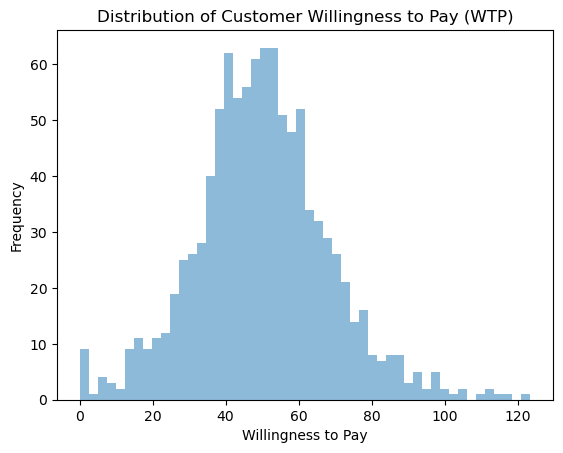

In [3]:
# Plot WTP distribution truncated at zero (non-negative willingness to pay)
plt.hist(WTP, bins=50, alpha=0.5)
plt.title('Distribution of Customer Willingness to Pay (WTP)')
plt.xlabel('Willingness to Pay')
plt.ylabel('Frequency')
plt.show()

## Single Pricing Strategy: Finding the Optimal Price to Maximize Revenue

In a single pricing strategy, every customer is charged the same price for a product, regardless of their individual willingness to pay (WTP). Here's how we approach finding the optimal single price to maximize revenue:

1. **Generate Possible Prices**: Based on the minimum and maximum WTP, we generate a list of possible prices that the business can charge, incremented by 10 cents.

2. **Calculate Demand**: For each price in the list, we calculate the demand, i.e., the number of customers whose WTP is greater than or equal to that price.

3. **Calculate Revenue**: For each price, we multiply the price by the corresponding demand to calculate the revenue that would be generated at that price point.

4. **Find the Optimal Price**: We evaluate the revenues for all the price points in our list and identify the price that generates the highest revenue. This price is considered the optimal price for the single pricing strategy.

5. **Plot the Revenue Curve**: We can also plot the revenue curve as a function of price to visually analyze how changes in price affect revenue. The peak of this curve corresponds to the optimal price.

6. **Comparison with Differential Pricing**: The revenue from the single pricing strategy can be compared with revenues from various differential pricing strategies to analyze the benefits and trade-offs of different approaches.

The single pricing strategy serves as a baseline for comparison with more complex, segmented pricing strategies. By understanding how revenue varies with price in the single-price context, we can appreciate the potential advantages of employing differential pricing to better match prices with individual customers' WTP.

In [4]:
# Generate a list of prices that a business can charge
min_price = np.floor(min(WTP))
max_price = np.ceil(max(WTP))
prices = np.arange(min_price, max_price, 0.10)

# Calculate demand and revenue at each price point
optimal_price = 0
max_revenue = 0

demands = []
revenues = []

for price in prices:
    demand = sum(WTP >= price)
    revenue = demand * price
    demands.append(demand)
    revenues.append(revenue)
    
    if revenue > max_revenue:
        max_revenue = revenue
        optimal_single_price = price

print(f"The optimal single price is ${optimal_single_price:.2f}, and it generates a revenue of ${max_revenue:.2f}.")

The optimal single price is $36.60, and it generates a revenue of $29389.80.


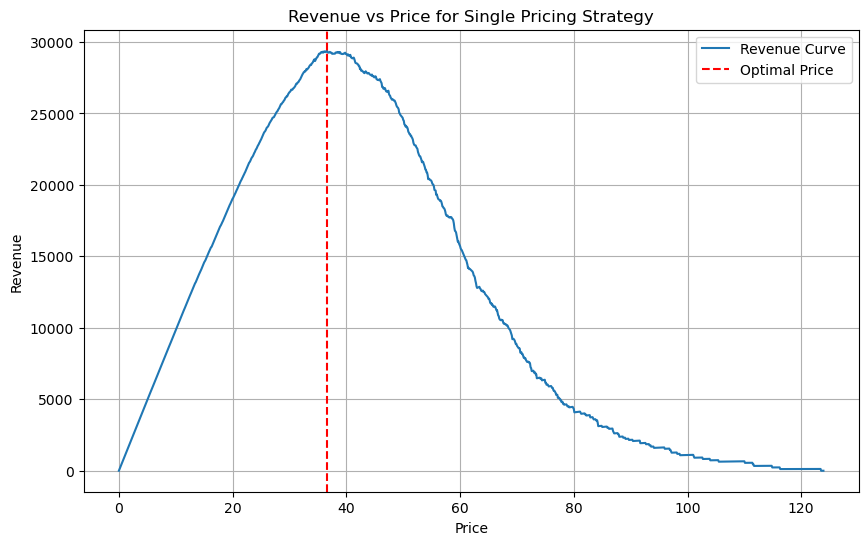

In [5]:
# Plot revenue curve
plt.figure(figsize=(10, 6))
plt.plot(prices, revenues, label='Revenue Curve')
plt.axvline(x=optimal_single_price, color='r', linestyle='--', label='Optimal Price')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Revenue vs Price for Single Pricing Strategy')
plt.legend()
plt.grid(True)
plt.show()

## Differential Pricing Strategies: Finding Optimal Price Points to Maximize Total Revenue

The goal of differential pricing is to segment customers according to their willingness to pay (WTP) and charge different prices to different segments to maximize total revenue. Here's how we approach finding the optimal price points for different strategies:

1. **Define the Objective Function**: The objective function calculates the total revenue for a given set of prices. We want to find the prices that maximize this revenue.

2. **Customer Segmentation**: The WTP values are sorted in descending order, and the customers are divided into segments according to the number of price points chosen. For example, if we have a two-price strategy, we divide the customers into two equal-sized segments.

3. **Calculate Segment Revenue**: For each segment, we calculate the revenue by multiplying the number of customers willing to pay at or above the given price by the price itself. We sum the revenues from all segments to get the total revenue.

4. **Optimization Method**: We use an optimization technique to find the prices that maximize the total revenue. This involves iteratively adjusting the prices and evaluating the objective function until we find the values that provide the maximum revenue.

5. **Constraints and Boundaries**: While not implemented in the basic version of this analysis, further refinement might include specific constraints or boundaries on the prices, reflecting real-world business rules and market conditions.

6. **Repeat for Different Strategies**: We repeat this process for different numbers of price points (e.g., 2-price strategy, 3-price strategy) to understand how the number of differentiated prices impacts total revenue.

7. **Comparison with Single Pricing**: Finally, we compare the revenues from the differential pricing strategies with the revenue from a single-price strategy to illustrate how differential pricing can improve revenue.

This method enables us to find the optimal price points that align with different business strategies, allowing for an analytical exploration of various pricing policies and their impact on revenue.

---

## The process of designing a differential pricing strategy

### Step 1: Understanding the Problem

We have a customer base with a given willingness to pay (WTP) following a logistic distribution. The goal is to divide the customers into different segments and find the optimal price for each segment to maximize revenue.

### Step 2: Defining the Strategy

The single price strategy gives one price for all customers. The differential pricing strategy will divide customers into segments and set an optimal price for each segment. If done correctly, this should allow for more nuanced pricing that better captures customer WTP, thereby maximizing revenue.

### Step 3: Creating the Segments

One approach could be to sort the WTP and then divide customers into equal-sized segments. Each segment can have a different price.

### Step 4: Defining the Objective Function

We'll create an objective function that takes the segment prices as input and returns the total revenue for the given prices. The total revenue will be the sum of the revenue from each segment, which is the price for that segment times the number of customers in the segment with WTP greater or equal to that price.

### Step 5: Implementing the Optimization

We will use an optimization algorithm to find the prices that maximize the total revenue. We must also ensure that the optimal prices found for the differential pricing strategy are higher than the single price strategy.

### Step 6: Code Implementation

Let's try to implement the above logic.

In [10]:
# Sorting the WTP
sorted_WTP = np.sort(WTP)

# Define the objective function to minimize
def total_revenue(prices):
    revenue = 0
    segment_size = len(WTP) // len(prices)
    for i, price in enumerate(prices):
        segment = sorted_WTP[i * segment_size: (i + 1) * segment_size]
        segment_revenue = sum(wtp >= price for wtp in segment) * price
        revenue += segment_revenue
    return -revenue

# Create a bounds constraint to ensure the prices are within a valid range
bounds = [(min_price, max_price)] * 10

# Iterate through 2 to 10 pricing strategies
# Here, we are using the differential_evolution optimizer from SciPy, which is a global optimization algorithm suitable for this kind of problem. 
optimal_prices = {}
for num_prices in range(2, 11):
    result = differential_evolution(total_revenue, bounds[:num_prices])
    optimal_prices[num_prices] = {'prices': result.x, 'revenue': -result.fun}

# Print the results
for k, v in optimal_prices.items():
    print(f"For {k}-price strategy, optimal prices are: {v['prices']}, total revenue: ${v['revenue']:.2f}")


For 2-price strategy, optimal prices are: [32.74573463 49.64504923], total revenue: $36414.51
For 3-price strategy, optimal prices are: [25.81247867 42.24606494 56.09920538], total revenue: $39356.97
For 4-price strategy, optimal prices are: [25.58723433 39.04219443 49.12650519 60.60714672], total revenue: $41658.27
For 5-price strategy, optimal prices are: [22.82657412 37.13634295 45.5357337  53.66962919 63.23141973], total revenue: $42724.67
For 6-price strategy, optimal prices are: [22.91425633 34.45521118 42.28430154 48.5602687  55.44044491 66.43709534], total revenue: $43393.91
For 7-price strategy, optimal prices are: [19.86989848 32.6718781  39.45568034 46.43567534 52.35961007 58.50249299
 67.92293548], total revenue: $43993.21
For 8-price strategy, optimal prices are: [18.90296848 29.3714109  38.60881274 43.83903998 48.44123457 54.42926875
 60.41400184 69.2300704 ], total revenue: $44535.06
For 9-price strategy, optimal prices are: [20.8201979  29.95687006 37.0574428  42.305456

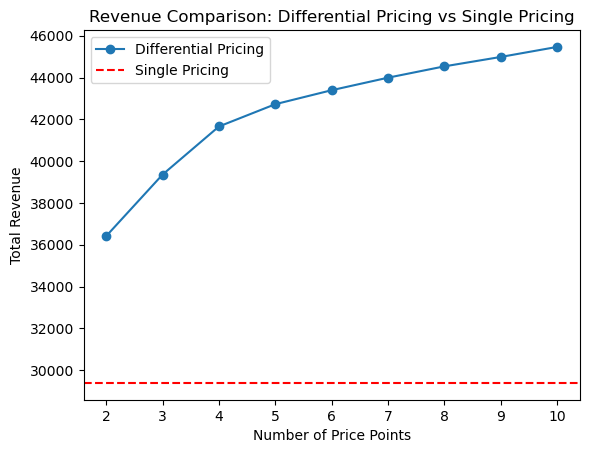

In [11]:
# Plot total revenues for different pricing strategies
differentiated_revenues = [v['revenue'] for k, v in optimal_prices.items()]

plt.plot(range(2, 11), differentiated_revenues, marker='o', label='Differential Pricing')
plt.axhline(y=max_revenue, color='r', linestyle='--', label='Single Pricing')
plt.xlabel('Number of Price Points')
plt.ylabel('Total Revenue')
plt.title('Revenue Comparison: Differential Pricing vs Single Pricing')
plt.legend()
plt.show()

## Conclusion

### Key Findings

1. **Single Pricing Strategy**: We explored a single pricing strategy where all customers are charged the same price. The optimal price was identified that maximizes revenue under this approach, serving as a benchmark for comparison with differential pricing.

2. **Differential Pricing Strategy**: We then analyzed a differential pricing strategy, dividing customers into different segments based on their willingness to pay (WTP) and finding optimal prices for each segment. This approach allowed us to capture more of the available customer surplus, resulting in higher revenues for strategies with more price points.

3. **Visualization Insights**: The plots provided a vivid representation of how revenue changes with price in both single and differential pricing strategies. The visualization aids in understanding the impact of different pricing tactics.

### Implications

- **Revenue Maximization**: Differential pricing, when implemented correctly, can lead to higher revenues compared to a single pricing strategy. The ability to tailor prices to different customer segments enables better alignment with customer WTP.

- **Strategic Pricing Considerations**: The analysis demonstrates the importance of understanding customer WTP and the market context when designing pricing strategies. The choice between single and differential pricing must be considered in light of business objectives, customer behavior, and operational constraints.

- **Optimization Techniques**: The application of optimization algorithms, such as differential evolution, provided a robust method to find the optimal set of prices under different scenarios. These techniques can be applied to more complex pricing models in real-world settings.

### Limitations and Future Work

- **Model Complexity**: The analysis was based on a simplified model of customer behavior. In reality, factors such as competitive landscape, market trends, and customer segmentation might further influence pricing dynamics.

- **Data Considerations**: The simulated data was based on a logistic distribution for WTP. More accurate analysis might be conducted using real-world data or more sophisticated demand models.

- **Advanced Pricing Strategies**: Further research could explore more nuanced pricing strategies such as dynamic pricing, bundle pricing, or personalized pricing that can be more tailored to specific business contexts.

### Final Thoughts

This notebook provides an in-depth analysis of pricing strategies, illustrating the trade-offs and opportunities in selecting different pricing approaches. By leveraging mathematical modeling and optimization techniques, we gain insights into how pricing decisions can impact revenue, offering valuable lessons for business strategy and decision-making.